# TP1: Composição Chroma Key

In [352]:
%reset
import numpy as np
import matplotlib.pyplot as plt
import skimage.exposure as skie
import seaborn as sns
import skimage as sk
import skimage.io as io
import skimage.color as color
from skimage.transform import rescale
from skimage import img_as_float
from skimage.draw import set_color
from skimage.transform import rotate
%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


Função que mostra uma imagem:

In [353]:
def show(img):
    fig, ax = plt.subplots(1, 1)
    ax.imshow(img)
    ax.set_axis_off()
    plt.show()

Histograma do H em hsv:

In [354]:
def hist_h(img,intensidade):
    plt.hist(img[:,:,0].flatten(),256)
    plt.xlim((0.27,0.4))
    plt.ylim((0,intensidade))
    plt.show()

Função que define uma máscara True e False com H no intervalo maior>h>menor:

In [355]:
def mascara(hsv,maior,menor):
    h, s, v = np.rollaxis(hsv, axis=-1)
    return (maior>h) & (h>menor)


Função que sobrepõe img com máscara mask1 em um fundo a partir das posições x e y:

In [356]:
def sobrepor(x,y,background,img,mask1):
    mask_background = np.ones((background.shape[0],background.shape[1]), dtype=bool)
    mask_background[x:(mask1.shape[0]+x),y:(mask1.shape[1]+y)] = mask1
    for i in range(3):
        img_aux = np.ma.array(img[:,:,i],mask=mask1)
        np.place(background[:,:,i],~mask_background,img_aux.compressed())
    return background

Imagem de fundo:

/home/janarf/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


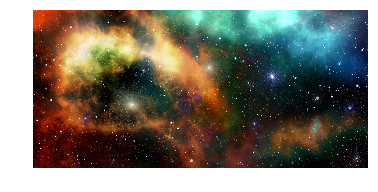

In [357]:
background = rescale(io.imread('universe-2742113_1920.jpg'),0.7)   
show(background)

In [358]:
n=1
#n é a escala só pra testar sem ficar mto lento, depois mudar pra 1

/home/janarf/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


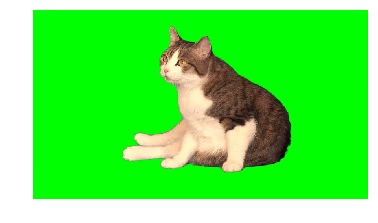

In [359]:
gato = rescale(io.imread('cat5.jpg'),n)   
show(gato)

/home/janarf/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


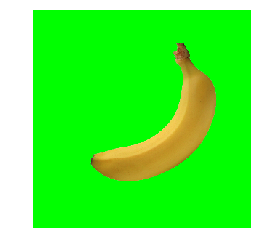

In [360]:
banana = rescale(io.imread('banana.jpg'),n*0.3)   
show(banana)

Transforma a imagem em hsv:

In [361]:
gatohsv = color.rgb2hsv(gato)

Histograma só do H:

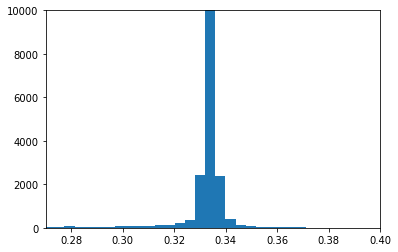

In [362]:
hist_h(gatohsv,10000)


A partir do histograma acima temos que o  verde do fundo tem hue entre 0.34 e 0.36

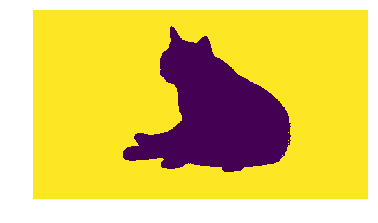

In [363]:
maskgato = mascara(gatohsv,0.37,0.28)
show(maskgato)

In [364]:
(background.shape[1]-gato.shape[1])/2

246.0

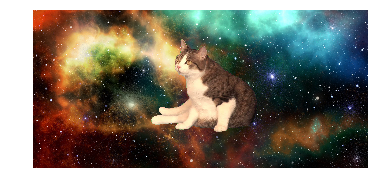

In [365]:
show(sobrepor(76,246,background,gato,maskgato))

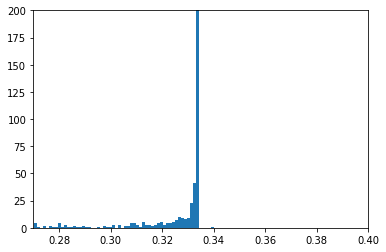

In [366]:
bananahsv = color.rgb2hsv(banana)
hist_h(bananahsv,200)

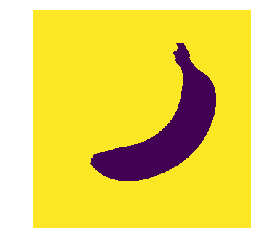

In [367]:
maskbanana = mascara(bananahsv,0.34,0.28)
show(maskbanana)

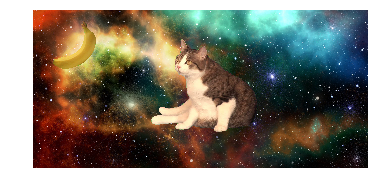

In [368]:
show(sobrepor(0,0,background,banana,maskbanana))

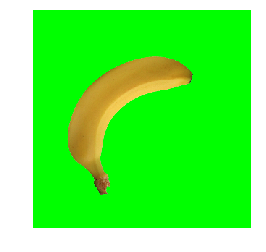

In [369]:
bananarot = rotate(banana,180,resize=True,mode='edge')
show(bananarot)

In [370]:
banana2hsv = color.rgb2hsv(bananarot)
maskbanana2 = mascara(banana2hsv,0.34,0.32)